# NB02 - Data Analysis
**Author:** Thea West

**Description:**
...

## TODO: remove all loops

In [18]:
%config InlineBackend.figure_formats = ['svg']

import requests
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mticker

from IPython.display import Image

First load the data from the CSV:

In [19]:
df = pd.read_csv("data/rain_data_2024.csv")
df

,time,rain_sum,precipitation_hours,city,rainy_day
0,2024-01-01,8.3,8.0,London,True
1,2024-01-02,9.6,11.0,London,True
2,2024-01-03,2.3,6.0,London,True
3,2024-01-04,27.7,8.0,London,True
4,2024-01-05,4.6,8.0,London,True
...,...,...,...,...,...
1825,2024-12-27,0.0,0.0,Dublin,False
1826,2024-12-28,0.0,0.0,Dublin,False
1827,2024-12-29,0.0,0.0,Dublin,False
1828,2024-12-30,0.0,0.0,Dublin,False


Let's start by viewing the number of rainy days in 2024 by city:

In [21]:
# Get total number of rainy days in the year per city
total_rainy_days = {
    "London": 0,
    "Paris": 0,
    "Brussels": 0,
    "Amsterdam": 0, 
    "Dublin": 0
}
for i in range(len(df)):
    if df['rainy_day'][i]:
        total_rainy_days[df['city'][i]] = total_rainy_days[df['city'][i]] + 1

total_rainy_days

{'London': 163, 'Paris': 189, 'Brussels': 197, 'Amsterdam': 192, 'Dublin': 207}

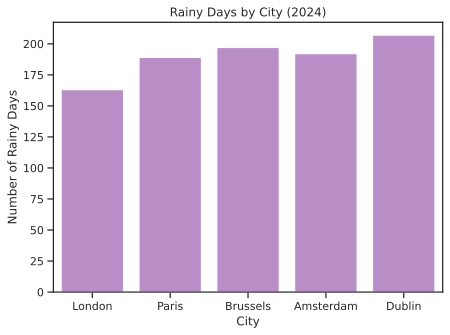

In [51]:
my_color = ["#be84d1"]
sns.set_theme(
    style="ticks",
    palette = my_color
)
sns.barplot(x=list(total_rainy_days.keys()), y=list(total_rainy_days.values()))

plt.xlabel("City")
plt.ylabel("Number of Rainy Days")
plt.title("Rainy Days by City (2024)")
#plt.title("A \"rainy day\" has at least 2.5mm of rain or at least 4 hours of rain")


plt.tight_layout()

According to this definition of a "rainy day" London actually had the fewest rainy days of all five cities in 2024! Let's look closer at the London data to see where it's reputation might come from.

In [50]:
london_df = df[df["city"] == "London"]
# london_df

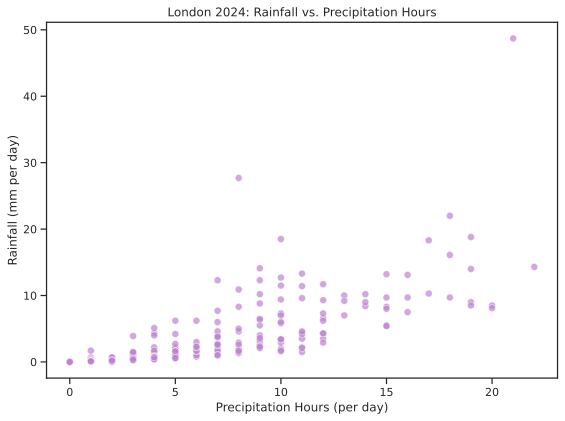

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter your raw daily points
sns.scatterplot(
    data=london_df,
    x="precipitation_hours",
    y="rain_sum",
    s=50,                # size of each point
    alpha=0.7,           # make them a bit transparent
    edgecolor="w",       # white border around each dot
    ax=ax
)

# 5) Overlay a best‐fit line (no new points)
#sns.regplot(
#    data=london_df,
#    x="precipitation_hours",
#    y="rain_sum",
#    scatter=False,       # don’t re‐draw the scatter
#    ax=ax,
#    line_kws={"linestyle":"--", "linewidth":1}
#)

# Labels and title
ax.set_xlabel("Precipitation Hours (per day)")
ax.set_ylabel("Rainfall (mm per day)")
ax.set_title("London 2024: Rainfall vs. Precipitation Hours")

# Tidy up and show
plt.tight_layout()
plt.show()
